# Introduction

Today, our goal is to apply machine learning methods in Python to classify stars into types using multiple features.

# Understanding the Data

In [1]:
#importing dataset and libraries
import numpy as np 
import pandas as pd 

df = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")

Lets take a look at our dataset:

In [2]:
df.shape

(240, 7)

In [3]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


The features we have here are a few properties of a star:

* Absolute Temperature (in K) 
Temperature of the Star in Kelvin
* Relative Luminosity (L/Lo)
Relative Luminosity is the ratio of brightness (Luminosity) of the star with the brightness of the Sun.
* Relative Radius (R/Ro)
Relative Radius is again the ratio of the radius of a star compared to the radius of the Sun.
* Absolute Magnitude (Mv)
Absolute magnitude (M) is a measure of the luminosity of a celestial object, on an inverse logarithmic astronomical magnitude scale.
* Star Color (white,Red,Blue,Yellow,yellow-orange etc)
Self explainatory. It is the colour of Star as it appears in the sky.
* Spectral Class (O,B,A,F,G,K,,M)
It is basically a class in which a star falls based on most of the above features.
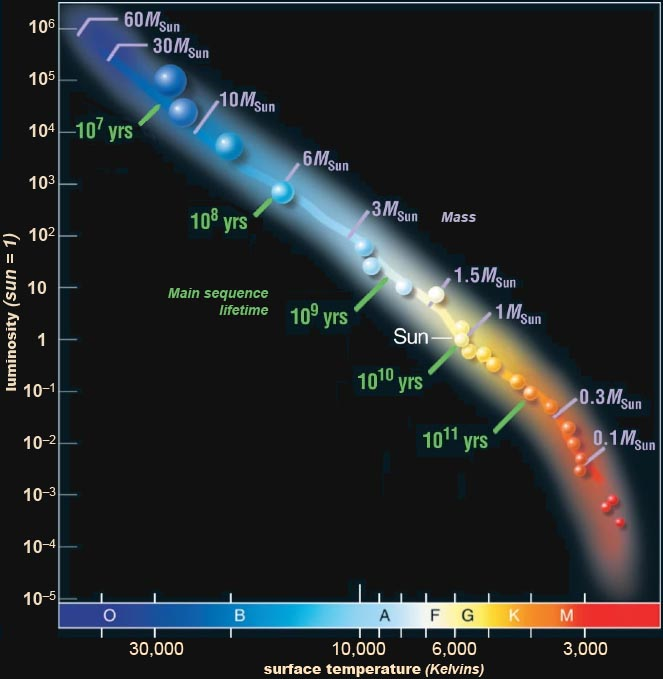
* Star Type (Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)
Type of star. We'll be trying to predict this value using the features

In [4]:
#checking for missing values
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [5]:
#different star types and Spectral Classes
df['Star type'].value_counts() , df['Spectral Class'].value_counts()

(5    40
 4    40
 3    40
 2    40
 1    40
 0    40
 Name: Star type, dtype: int64,
 M    111
 B     46
 O     40
 A     19
 F     17
 K      6
 G      1
 Name: Spectral Class, dtype: int64)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

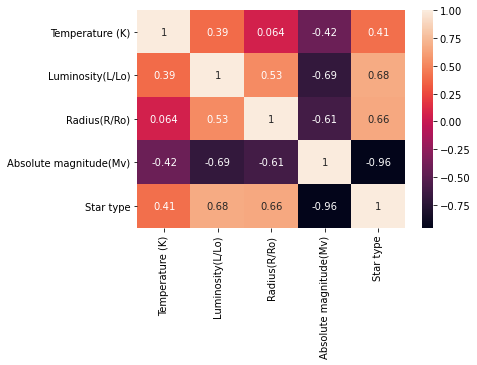

In [7]:
#checking correlation between variables for PCA
sns.heatmap(data = df.corr(), annot = True)

# PCA and Normalizing 

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Star_color'] = labelencoder.fit_transform(df['Star color'])
df['Spectral_Class'] = labelencoder.fit_transform(df['Spectral Class'])

In [9]:
features = df.drop(['Star type','Star color','Spectral Class'], axis = 1)
labels = df['Star type']

In [10]:
#scaling our training model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

Text(0.5, 0, 'Principal Component number')

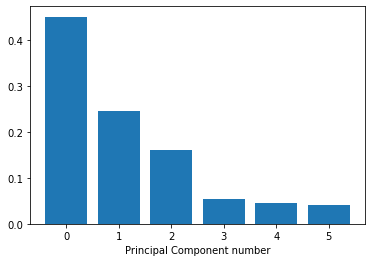

In [12]:
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component number')

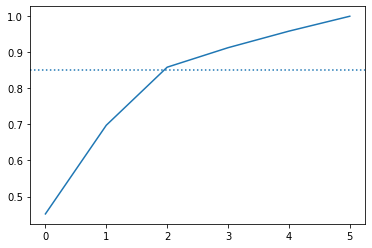

In [13]:
cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle=':')

We can assume n_components equal to 2 as about 85% of the variance can be explained, hence we perform PCA with number of components equal to 2.

In [14]:
n_component = 2

pca = PCA(n_component, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

# Model Building

**Spliting Dataset**

In [15]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

**Decision Tree Classifier**

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=10)
dt.fit(train_features, train_labels)
pred_labels_tree = dt.predict(test_features)

**Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

**Random Forest Classifier**

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=10)
clf.fit(train_features, train_labels)

RandomForestClassifier(random_state=10)

# Validation

We'll be using KFold Cross validation to validate and compare all 3 of our models

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10)

tree = DecisionTreeClassifier()
logreg = LogisticRegression()
clf = RandomForestClassifier()

tree_score = cross_val_score(tree, pca_projection, labels, cv=kf)
logit_score = cross_val_score(logreg, pca_projection, labels, cv=kf)
rt_score = cross_val_score(clf,pca_projection, labels, cv=kf)

# Mean of all the score arrays
print("Decision Tree:", np.mean(tree_score),"Logistic Regression:", np.mean(logit_score),"Random Forest:",np.mean(rt_score))

Decision Tree: 0.8666666666666668 Logistic Regression: 0.8 Random Forest: 0.85


# Conclusion

I would like to mention a amazing reference that I read and learnt from:

https://dataphrase.github.io/songclfy/

Thanks for reading! Any Suggestions and improvements are welcomed.